## cl - Cloud fraction in vertical coordinate layer

Low Cloud Fraction (LCF) - maximum cloud fraction from 1000-600 hpa <br>
High Cloud Fraction (HCF) - maximum cloud fraction from 250-100 hpa <br>

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy

from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [2]:
from plotFuncs import *

In [3]:
from myFuncs import *

### one dataset

In [31]:
variable = 'cl'

models = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

observations = [
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments = [
    # 'historical',
    'rcp85'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])
ds

variable:cl, dataset:CNRM-CM5, experiment:rcp85, resolution:regridded


<xarray.Dataset>
Dimensions:  ()
Data variables:
    cl       float64 ...

In [37]:
def data_exist(model, experiment, variable):
    data_exist = 'yes'

    if variable == 'cl':
        if model == 'CNRM-CM5' or model == 'CCSM4' or model == 'HadGEM2-AO':
            data_exist = ''
        if (model == 'EC-EARTH' or model == 'CESM1-BGC') and experiment == 'rcp85':
            data_exist = ''
    
    return data_exist


In [34]:
datasets[0]

'CNRM-CM5'

In [38]:
if data_exist(datasets[0], experiments[0], variable):
    print('executes')

In [32]:
data = ds['cl']
data

<xarray.DataArray 'cl' ()>
array(nan)

In [6]:
ds['lev']

<xarray.DataArray 'lev' (lev: 48)>
array([9.961099e-01, 9.873945e-01, 9.767074e-01, 9.637827e-01, 9.482209e-01,
       9.295540e-01, 9.072550e-01, 8.807399e-01, 8.493971e-01, 8.126292e-01,
       7.698747e-01, 7.206968e-01, 6.648809e-01, 6.026212e-01, 5.350591e-01,
       4.649418e-01, 3.963630e-01, 3.331552e-01, 2.773648e-01, 2.292632e-01,
       1.882549e-01, 1.535420e-01, 1.243594e-01, 9.999907e-02, 7.981281e-02,
       6.321172e-02, 4.966566e-02, 3.870170e-02, 2.990173e-02, 2.289962e-02,
       1.737780e-02, 1.306353e-02, 9.724891e-03, 7.166759e-03, 5.226664e-03,
       3.770814e-03, 2.690258e-03, 1.897296e-03, 1.322170e-03, 9.100661e-04,
       6.184560e-04, 4.147679e-04, 2.743885e-04, 1.787529e-04, 1.136180e-04,
       6.865516e-05, 3.801024e-05, 1.710525e-05])
Coordinates:
  * lev      (lev) float64 0.9961 0.9874 0.9767 ... 3.801e-05 1.711e-05
Attributes:
    long_name:      hybrid sigma pressure coordinate
    units:          1
    positive:       down
    axis:           Z
    bounds:         lev_bnds
    formula:        p(n,k,j,i) = a(k)*p0 + b(k)*ps(n,j,i)
    formula_terms:  p0: p0 a: a b: b ps: ps
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinate

In [7]:
p_hybridSigma = ds.a*ds.p0 + ds.b*ds.ps
p_hybridSigma

<xarray.DataArray (time: 360, lev: 48, lat: 36, lon: 144)>
array([[[[1.01894608e+05, 1.01846304e+05, 1.01776078e+05, ...,
          1.01929760e+05, 1.01935698e+05, 1.01926608e+05],
         [1.01908842e+05, 1.01844686e+05, 1.01756366e+05, ...,
          1.01972110e+05, 1.01971457e+05, 1.01952165e+05],
         [1.01852997e+05, 1.01774849e+05, 1.01672155e+05, ...,
          1.01944741e+05, 1.01933293e+05, 1.01903705e+05],
         ...,
         [9.53060079e+04, 9.76435940e+04, 9.97014663e+04, ...,
          8.87995016e+04, 9.09023548e+04, 9.36012271e+04],
         [9.14276498e+04, 9.54830517e+04, 9.96286721e+04, ...,
          9.20106883e+04, 8.87169719e+04, 9.00606065e+04],
         [9.32008201e+04, 9.36241144e+04, 9.58309605e+04, ...,
          9.96099249e+04, 9.61537795e+04, 9.55944376e+04]],

        [[1.00997530e+05, 1.00949773e+05, 1.00880341e+05, ...,
          1.01032285e+05, 1.01038155e+05, 1.01029169e+05],
         [1.01011603e+05, 1.00948173e+05, 1.00860852e+05, ...,
          1.01074156e+05, 1.01073510e+05, 1.01054436e+05],
         [1.00956390e+05, 1.00879125e+05, 1.00777593e+05, ...,
          1.01047096e+05, 1.01035778e+05, 1.01006525e+05],
...
         [3.93428993e+00, 3.93428993e+00, 3.93428993e+00, ...,
          3.93428993e+00, 3.93428993e+00, 3.93428993e+00],
         [3.93428993e+00, 3.93428993e+00, 3.93428993e+00, ...,
          3.93428993e+00, 3.93428993e+00, 3.93428993e+00],
         [3.93428993e+00, 3.93428993e+00, 3.93428993e+00, ...,
          3.93428993e+00, 3.93428993e+00, 3.93428993e+00]],

        [[1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         ...,
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00]]]])
Coordinates:
  * lev      (lev) float64 0.9961 0.9874 0.9767 ... 3.801e-05 1.711e-05
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -35.0 -33.0 -31.0 -29.0 -27.0 ... 29.0 31.0 33.0 35.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8

In [8]:
p_hybridSigma.isel(time=0).sel(lat=1.0,lon=1.25)

<xarray.DataArray (lev: 48)>
array([1.00643028e+05, 9.97601049e+04, 9.86748694e+04, 9.73625298e+04,
       9.57826130e+04, 9.38877065e+04, 9.16244746e+04, 8.89338757e+04,
       8.57541748e+04, 8.20251650e+04, 7.76905610e+04, 7.27068239e+04,
       6.70532907e+04, 6.07507298e+04, 5.39146440e+04, 4.68206485e+04,
       3.98808444e+04, 3.34857659e+04, 2.78492837e+04, 2.30045659e+04,
       1.88885137e+04, 1.54091885e+04, 1.24835684e+04, 1.00408760e+04,
       8.01625684e+03, 6.35080078e+03, 4.99146631e+03, 3.89092334e+03,
       3.00732324e+03, 2.30401050e+03, 1.74918298e+03, 1.31552087e+03,
       9.79789001e+02, 7.22429749e+02, 5.27154541e+02, 3.80544556e+02,
       2.71668335e+02, 1.91722839e+02, 1.33702576e+02, 9.21002350e+01,
       6.26404419e+01, 4.20468979e+01, 2.78422012e+01, 1.81597347e+01,
       1.15712252e+01, 7.03295517e+00, 3.93428993e+00, 1.84861004e+00])
Coordinates:
  * lev      (lev) float64 0.9961 0.9874 0.9767 ... 3.801e-05 1.711e-05
    time     object 1970-01-16 12:00:00
    lat      float64 1.0
    lon      float64 1.25

In [9]:
data_regrid = regrid_conserv(data)
data_regrid

<xarray.DataArray (time: 360, plev: 48, lat: 22, lon: 128)>
array([[[[1.86652143e-01, 2.30085212e-01, 2.90495178e-01, ...,
          1.76565731e-01, 1.64557506e-01, 1.45209654e-01],
         [2.28507437e-01, 2.68164708e-01, 3.12032455e-01, ...,
          1.31420562e-01, 1.46934868e-01, 1.76330112e-01],
         [3.26841733e-01, 3.46232448e-01, 3.78459190e-01, ...,
          1.30766331e-01, 1.55485053e-01, 2.09462849e-01],
         ...,
         [6.20995526e-04, 1.23208191e-03, 4.34988542e-03, ...,
          7.07544719e-04, 4.43593511e-05, 3.92373808e-04],
         [9.97385470e-02, 4.24321063e-01, 7.12895249e-01, ...,
          4.06729385e-02, 9.78749566e-04, 8.68094368e-03],
         [3.54187501e-01, 1.03408695e+00, 9.32807267e-01, ...,
          4.14737501e-01, 3.55918782e-01, 1.14198718e-01]],

        [[2.77580568e-01, 3.36424114e-01, 4.33457001e-01, ...,
          2.82303942e-01, 2.52904648e-01, 2.21940328e-01],
         [3.28152388e-01, 3.89435458e-01, 4.66593062e-01, ...,
          2.00595894e-01, 2.15891459e-01, 2.55018356e-01],
         [4.71993427e-01, 5.08262442e-01, 5.58298271e-01, ...,
          1.91667818e-01, 2.24511490e-01, 3.01765369e-01],
...
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]]])
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * plev     (plev) float64 0.9961 0.9874 0.9767 ... 3.801e-05 1.711e-05
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    cell_methods:      time: mean
    interp_method:     conserve_order1
    long_name:         Cloud Area Fraction
    original_name:     tot_cloud_area
    units:             %
    standard_name:     cloud_area_fraction_in_atmosphere_layer
    original_units:    percent
    cell_measures:     area: areacella
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [10]:
p_hybridSigma_regrid = regrid_conserv(p_hybridSigma)
p_hybridSigma_regrid

<xarray.DataArray (time: 360, plev: 48, lat: 22, lon: 128)>
array([[[[1.01767114e+05, 1.01712863e+05, 1.01597713e+05, ...,
          1.01876042e+05, 1.01874078e+05, 1.01847377e+05],
         [1.01552768e+05, 1.01492883e+05, 1.01365962e+05, ...,
          1.01709016e+05, 1.01692017e+05, 1.01653484e+05],
         [1.01348777e+05, 1.01289745e+05, 1.01162118e+05, ...,
          1.01532207e+05, 1.01504979e+05, 1.01459055e+05],
         ...,
         [9.71453679e+04, 9.49286998e+04, 9.06149092e+04, ...,
          9.80168858e+04, 9.80430620e+04, 9.81485020e+04],
         [9.80535708e+04, 9.64178623e+04, 9.33897121e+04, ...,
          9.71063319e+04, 9.72346404e+04, 9.77283441e+04],
         [9.67163540e+04, 9.70275118e+04, 9.79043894e+04, ...,
          9.44896204e+04, 9.36085916e+04, 9.55013582e+04]],

        [[1.00871479e+05, 1.00817841e+05, 1.00703993e+05, ...,
          1.00979175e+05, 1.00977233e+05, 1.00950834e+05],
         [1.00659556e+05, 1.00600349e+05, 1.00474862e+05, ...,
          1.00814037e+05, 1.00797230e+05, 1.00759133e+05],
         [1.00457872e+05, 1.00399508e+05, 1.00273324e+05, ...,
          1.00639228e+05, 1.00612307e+05, 1.00566903e+05],
...
         [3.93428993e+00, 3.93428993e+00, 3.93428993e+00, ...,
          3.93428993e+00, 3.93428993e+00, 3.93428993e+00],
         [3.93428993e+00, 3.93428993e+00, 3.93428993e+00, ...,
          3.93428993e+00, 3.93428993e+00, 3.93428993e+00],
         [3.93428993e+00, 3.93428993e+00, 3.93428993e+00, ...,
          3.93428993e+00, 3.93428993e+00, 3.93428993e+00]],

        [[1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         ...,
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00]]]])
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * plev     (plev) float64 0.9961 0.9874 0.9767 ... 3.801e-05 1.711e-05
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

In [12]:
p_low = xr.where((p_hybridSigma_regrid<=1.5e5) & (p_hybridSigma_regrid>=6e4), 1, 0)
cl_low = data_regrid*p_low
cl_low = cl_low.max(dim='plev')
cl_low

<xarray.DataArray (time: 360, lat: 22, lon: 128)>
array([[[2.38626608e+01, 2.19991427e+01, 2.58156073e+01, ...,
         1.99519900e+01, 1.90292090e+01, 1.84779769e+01],
        [2.21078947e+01, 2.46037038e+01, 2.50496664e+01, ...,
         1.91677186e+01, 1.94379905e+01, 2.10815224e+01],
        [3.07589653e+01, 2.93805813e+01, 2.30035287e+01, ...,
         2.22192188e+01, 2.46069317e+01, 2.32399527e+01],
        ...,
        [2.78340397e+00, 4.80574835e+00, 7.32590845e+00, ...,
         1.31824548e+00, 1.27964701e+00, 7.48007235e-01],
        [2.67061313e+00, 4.51072341e+00, 6.92678218e+00, ...,
         4.71014938e+00, 3.93076913e+00, 2.25083171e+00],
        [7.11358731e+00, 7.44346608e+00, 7.17365356e+00, ...,
         1.03530461e+01, 1.10205270e+01, 8.27388410e+00]],

       [[3.11261229e+01, 3.38211344e+01, 3.12833147e+01, ...,
         2.16911455e+01, 2.61248614e+01, 2.90510495e+01],
        [3.11643376e+01, 3.61202218e+01, 3.30209885e+01, ...,
         1.72083851e+01, 1.80721203e+01, 2.26291607e+01],
        [3.53424825e+01, 3.88360474e+01, 2.82387889e+01, ...,
         1.14788965e+01, 1.61008018e+01, 1.71126397e+01],
...
        [7.62849750e-01, 5.01322611e-01, 1.23976335e-01, ...,
         2.12765902e-01, 2.15647457e-01, 6.16166593e-01],
        [5.71105652e-02, 8.47211550e-02, 5.47896653e-02, ...,
         5.08803985e-01, 7.65249473e-02, 6.48134200e-02],
        [1.42278047e+00, 1.50608191e+00, 8.95446435e-01, ...,
         5.77158420e+00, 2.73521913e+00, 1.33044829e+00]],

       [[2.44195525e+01, 2.32760895e+01, 2.37914929e+01, ...,
         2.87120612e+01, 2.70056495e+01, 2.45167008e+01],
        [2.54137530e+01, 2.42985203e+01, 2.67276871e+01, ...,
         3.02676454e+01, 2.68138702e+01, 2.43252202e+01],
        [2.43788510e+01, 2.43219366e+01, 2.69195938e+01, ...,
         2.39561704e+01, 2.26555308e+01, 2.25799814e+01],
        ...,
        [3.64363339e-03, 1.76596613e-02, 1.56394879e-01, ...,
         6.89834276e-04, 5.63175395e-04, 1.80898637e-04],
        [8.65281526e-02, 3.32908229e-01, 8.20180831e-01, ...,
         6.59042078e-02, 2.09921482e-02, 8.77487865e-03],
        [1.15010538e+00, 2.08762902e+00, 2.88422268e+00, ...,
         1.75904139e+00, 1.58797624e+00, 7.83949576e-01]]])
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

In [14]:
p_high = xr.where((p_hybridSigma_regrid<=2.5e4) & (p_hybridSigma_regrid>=0), 1, 0)
cl_high = data_regrid*p_high
cl_high = cl_high.max(dim='plev')
cl_high

<xarray.DataArray (time: 360, lat: 22, lon: 128)>
array([[[6.07456853e-01, 4.54547905e-01, 1.92150945e-01, ...,
         1.10161057e+01, 6.10198128e+00, 2.78423578e+00],
        [1.30984954e-03, 5.09385932e-04, 8.89445492e-04, ...,
         6.90385150e+00, 3.76349034e+00, 1.21321163e+00],
        [0.00000000e+00, 9.45106165e-03, 1.21786498e-01, ...,
         4.96056239e+00, 3.27149260e+00, 8.40564006e-01],
        ...,
        [6.93209769e+00, 7.91565396e+00, 9.18178878e+00, ...,
         4.66912861e+00, 6.10611033e+00, 6.76804254e+00],
        [5.55719233e+00, 7.53730706e+00, 1.00987097e+01, ...,
         6.44195298e-01, 1.33920101e+00, 2.56889882e+00],
        [8.10076015e-01, 2.34122559e+00, 5.63206402e+00, ...,
         6.66083484e-01, 3.64101581e-01, 2.13588068e-01]],

       [[6.49375338e+00, 4.37075985e+00, 1.90741466e+00, ...,
         1.75307958e+01, 1.45758834e+01, 1.13571642e+01],
        [9.37561701e-01, 4.04922067e-01, 4.07507278e-02, ...,
         1.81880604e+01, 1.17442422e+01, 5.50498029e+00],
        [5.20673452e-02, 2.02484120e-02, 9.28581487e-04, ...,
         1.22983384e+01, 5.81297695e+00, 1.91187668e+00],
...
        [2.72418069e+01, 2.69885162e+01, 2.54347892e+01, ...,
         2.43351300e+01, 2.45119894e+01, 2.53732411e+01],
        [2.04844574e+01, 2.08919373e+01, 2.06010860e+01, ...,
         1.60477285e+01, 1.65465860e+01, 1.78806249e+01],
        [1.07194981e+01, 1.12616014e+01, 1.18149541e+01, ...,
         1.32402726e+01, 1.26435621e+01, 1.12926116e+01]],

       [[5.15872264e-01, 2.72901344e-01, 4.09067101e-02, ...,
         6.42681278e+00, 4.18911019e+00, 2.09480851e+00],
        [4.12727541e-02, 1.60505155e-02, 9.57573828e-05, ...,
         3.69713033e+00, 2.10255687e+00, 7.69107790e-01],
        [1.46216478e-03, 7.99770795e-03, 7.57917688e-03, ...,
         2.10872253e+00, 6.53158270e-01, 1.27040304e-01],
        ...,
        [1.37177032e+01, 1.34651685e+01, 1.18982941e+01, ...,
         1.07735448e+01, 1.07534953e+01, 1.17453848e+01],
        [4.93481090e+00, 5.96135406e+00, 7.16176809e+00, ...,
         5.14788880e+00, 3.38943847e+00, 3.33854677e+00],
        [9.93359995e-01, 9.59473943e-01, 1.23184039e+00, ...,
         1.07913080e+01, 6.97091330e+00, 3.67804736e+00]]])
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

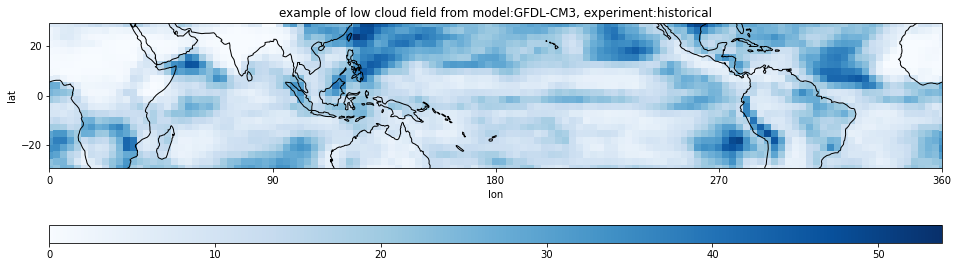

In [22]:
scene = cl_low.isel(time=0)
title = 'example of {} field from model:{}, experiment:{}'.format('low cloud', datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

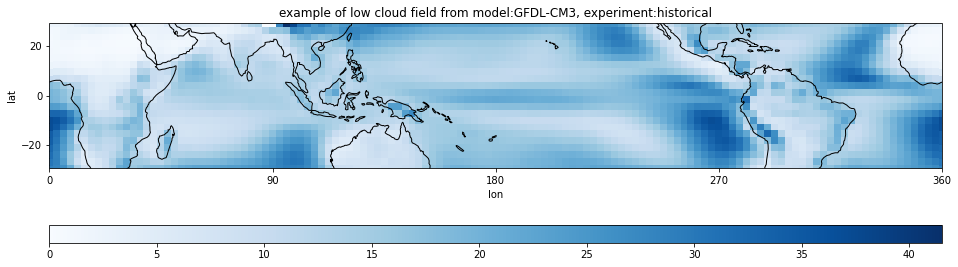

In [16]:
scene = cl_low.mean(dim='time')
title = 'example of {} field from model:{}, experiment:{}'.format('low cloud', datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

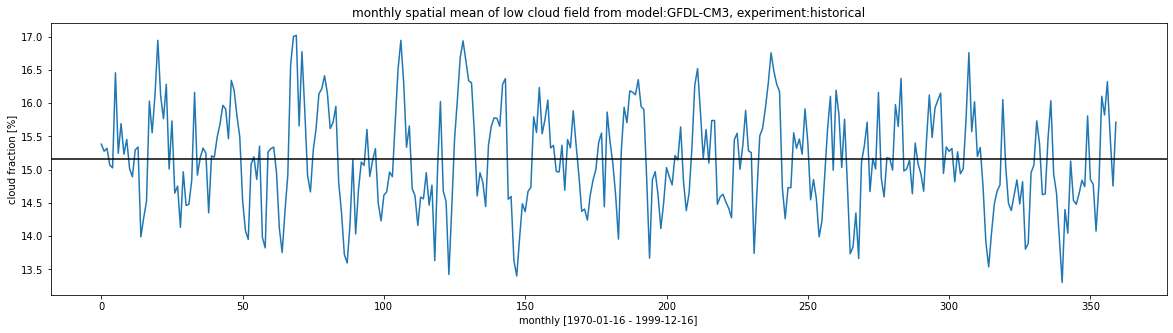

In [17]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

aWeights = np.cos(np.deg2rad(cl_low.lat))
y= cl_low.weighted(aWeights).mean(dim=('lat','lon'))
title = '{} spatial mean of {} field from model:{}, experiment:{}'.format(timeMean_options[0], 'low cloud', datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
ylabel = 'cloud fraction [{}]'.format('%')

plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

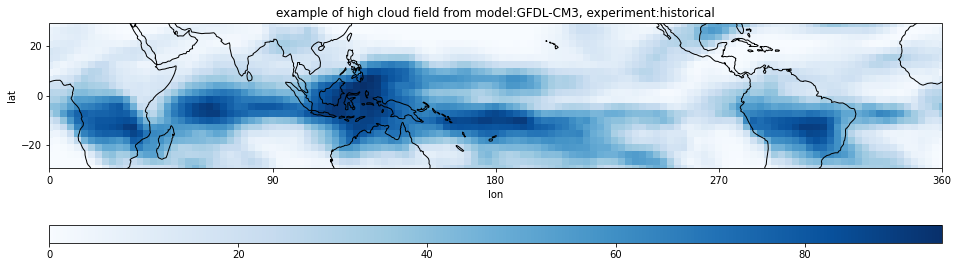

In [18]:
scene = cl_high.isel(time=0)
title = 'example of {} field from model:{}, experiment:{}'.format('high cloud', datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

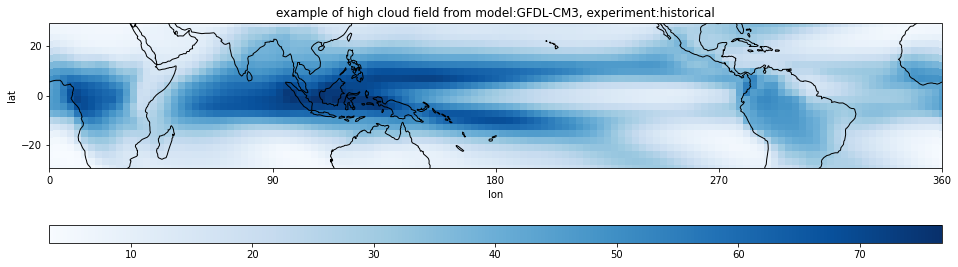

In [19]:
scene = cl_high.mean(dim='time')
title = 'example of {} field from model:{}, experiment:{}'.format('high cloud', datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

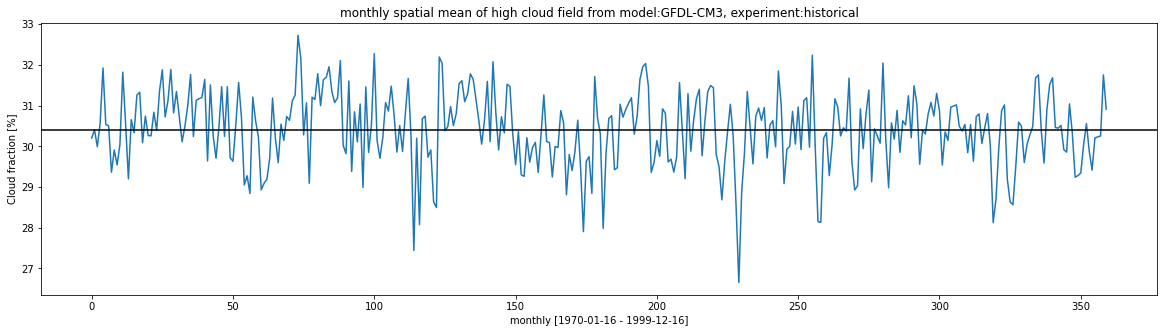

In [20]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

aWeights = np.cos(np.deg2rad(cl_high.lat))
y= cl_high.weighted(aWeights).mean(dim=('lat','lon'))
title = '{} spatial mean of {} field from model:{}, experiment:{}'.format(timeMean_options[0], 'high cloud', datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
ylabel = 'Cloud fraction [{}]'.format('%')


plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

In [23]:
def data_exist(model, experiment, variable):
    data_exist = 'yes'

    if variable == 'cl':
        if model == 'CNRM-CM5' or model == 'CCSM4' or model == 'HadGEM2-AO':
            data_exist = 'no'
        if (model == 'EC-EARTH' or model == 'CESM1-BGC') and experiment == 'rcp85':
            data_exist = 'no'
    
    return data_exist

In [26]:
variable = 'cl'

models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

observations = [
    ]

datasets = models + observations

experiments = [
    'historical',
    # 'rcp85'
    ]


for dataset in datasets:
    folder_save = home + '/Documents/data/cmip5/ds_cmip5/' + dataset
    for experiment in experiments:

        if data_exist(dataset, experiment, variable):
            ds = get_dsvariable(variable, dataset, experiment, resolution=resolutions[0])
            data = ds['cl']
            p_hybridSigma = ds.a*ds.p0 + ds.b*ds.ps

            data_regrid = regrid_conserv(data)
            p_hybridSigma_regrid = regrid_conserv(p_hybridSigma)

            cl_low = (data_regrid* xr.where((p_hybridSigma_regrid<=1.5e5) & (p_hybridSigma_regrid>=6e4), 1, 0)).max(dim='plev')            
            cl_high = (data_regrid * xr.where((p_hybridSigma_regrid<=2.5e4) & (p_hybridSigma_regrid>=0), 1, 0)).max(dim='plev')


            save_clouds = True
            if save_clouds:
                fileName = dataset + '_cloudFraction_' + experiment + '.nc'              
                ds_cl = xr.Dataset(
                    data_vars = {'cl_low':cl_low, 
                                'cl_high':cl_high},
                    attrs = {'description': 'Cloud fraction calculated as maximum between pressure levels identified from native hybrid sigma-pressure coordinates'}                  
                        )
                save_file(ds_cl, folder_save, fileName)

In [27]:
variable = 'cloudFraction'
ds = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])
ds

<xarray.Dataset>
Dimensions:  (time: 360, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    cl_low   (time, lat, lon) float64 ...
    cl_high  (time, lat, lon) float64 ...
Attributes:
    description:  Cloud fraction calculated as maximum between pressure level...

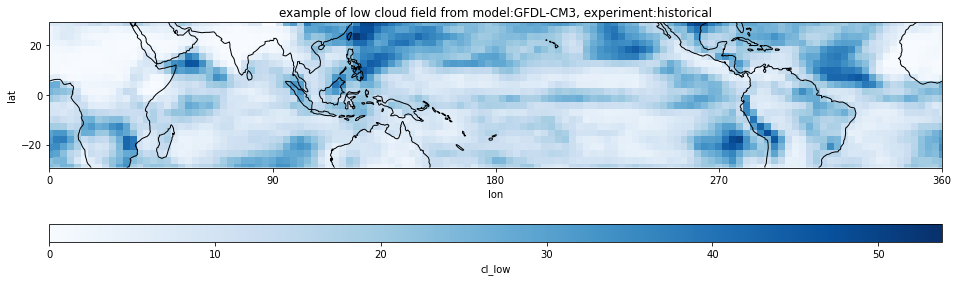

In [28]:
scene = ds.cl_low.isel(time=0)
title = 'example of {} field from model:{}, experiment:{}'.format('low cloud', datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

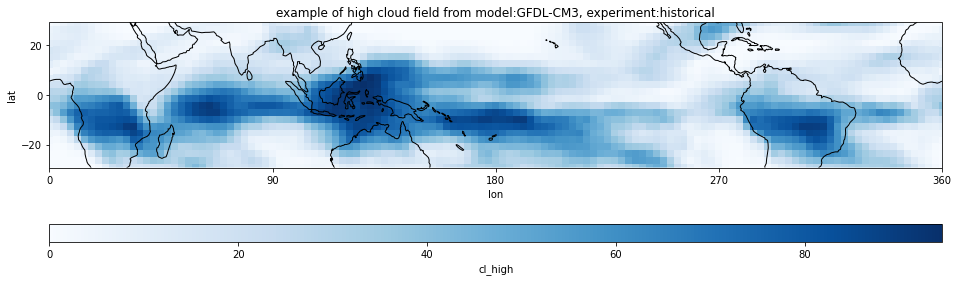

In [29]:
scene = ds.cl_high.isel(time=0)
title = 'example of {} field from model:{}, experiment:{}'.format('high cloud', datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

In [9]:
# In paper by Schiro, the low clouds were calculated from maximum cloud fraction between specified pressure levels after cloud fraction has been interpolated onto 
# 19 pressure levels from the native vertical levels

### interpolating to pressure coordinates

In [10]:
# function picks out datapoints belonging to range of pressure 1500 < x <= 925, 925 < x <= 850, and so on
# taking the vertical weighted mean of those datapoints to form a 2D of mean cloud fraction between two levels.
# The maximum cloud fraction in ranges of pressure can then be found, similar to the methodology of Schiro.

cl = ds['cl']
p_levs=np.array([1500.0, 925.0, 850.0, 700.0, 600.0, 500.0, 400.0, 300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 20.0, 10.0, 7.0, 5.0])*100
p_levs = xr.DataArray(
    data=p_levs,
    dims = 'plev'
    )

def convert_hybrid_to_pressure(cl, p_levs):
    cl_p = xr.DataArray(
        data = np.zeros(shape = (len(cl.time), len(p_levs)-1, len(cl.lat), len(cl.lon))),
        dims = ['time', 'plev', 'lat', 'lon'],
        coords = {'time':cl.time.data, 'plev': p_levs.data[1:], 'lat': cl.lat.data, 'lon': cl.lon.data}
        )

    for i in range(len(p_levs)-1):
        p_hybridSigma_section = xr.where((p_hybridSigma < p_levs[i]) & (p_hybridSigma >= p_levs[i+1]), 1, 0)
        cl_p[:, i, :, :] = (cl * p_hybridSigma * p_hybridSigma_section).sum(dim='lev')/(p_hybridSigma*p_hybridSigma_section).sum(dim='lev') 

    return cl_p

In [11]:
cl = ds['cl']
cl_p = convert_hybrid_to_pressure(cl, p_levs)

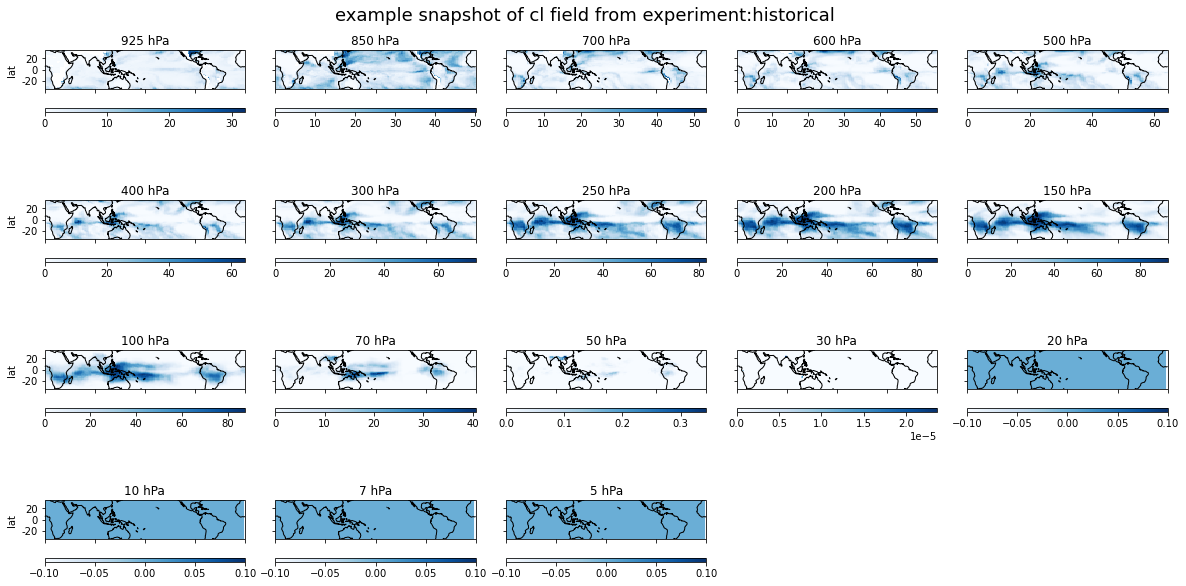

In [12]:
fig= plt.figure(figsize=(20,25))

title = 'example snapshot of {} field from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.6125)

for i, plev in enumerate(cl_p['plev']):
    ax= fig.add_subplot(5,5,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    scene = cl_p.isel(time=0)

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pcm = ax.pcolormesh(lonm,latm, scene.sel(plev=plev),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Blues', vmin=None, vmax=None)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    plt.title(str(int(plev.values/100))+ ' hPa')

    if i>=20:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.055, aspect=50, fraction=0.055)

    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.025, aspect=50, fraction=0.055)
        


    if i== 0 or i==5 or i==10 or i==15 or i==20:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)


In [13]:
# # cl_p.plev
# cl_low = cl_p.sel(plev = slice(1e5, 6e4))
# cl_low = cl_low.max(dim='plev')
# cl_high = regrid_conserv(cl_high)
# cl_high = cl_p.sel(plev = slice(2.5e4, 1e4))
# cl_high = cl_high.max(dim='plev')
# cl_high = regrid_conserv(cl_high)
# cl_high

# scene = cl_low.isel(time=0)
# title = 'example of {} field from model:{}, experiment:{}'.format('low clouds', datasets[0], experiments[0])
# cmap = 'Blues'
# plot_scene(scene, cmap=cmap, title = title)

# scene = cl_low.mean(dim='time')
# title = 'example of {} field from model:{}, experiment:{}'.format('low clouds', datasets[0], experiments[0])
# cmap = 'Blues'
# plot_scene(scene, cmap=cmap, title = title)

# timeMean_options = [
#     # 'annual',
#     # 'seasonal',
#     'monthly',
#     # 'daily'
#     ]

# aWeights = np.cos(np.deg2rad(cl_low.lat))
# y= cl_low.weighted(aWeights).mean(dim=('lat','lon'))
# title = '{} spatial mean of {} field from model:{}, experiment:{}'.format(timeMean_options[0], 'low cloud', datasets[0], experiments[0])
# xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
# ylabel = 'pr [{}]'.format('%')


# plot_timeseries(y, title=title, timeMean_option=timeMean_options)
# plt.xlabel(xlabel)
# plt.ylabel(ylabel)

# if timeMean_options[0]=='seasonal':
#     plt.legend()


# scene = cl_high.isel(time=0)
# title = 'example of {} field from model:{}, experiment:{}'.format('high clouds', datasets[0], experiments[0])
# cmap = 'Blues'
# plot_scene(scene, cmap=cmap, title = title)

# scene = cl_high.mean(dim='time')
# title = 'example of {} field from model:{}, experiment:{}'.format('high clouds', datasets[0], experiments[0])
# cmap = 'Blues'
# plot_scene(scene, cmap=cmap, title = title)

# timeMean_options = [
#     # 'annual',
#     # 'seasonal',
#     'monthly',
#     # 'daily'
#     ]

# aWeights = np.cos(np.deg2rad(cl_high.lat))
# y= cl_high.weighted(aWeights).mean(dim=('lat','lon'))
# title = '{} spatial mean of {} field from model:{}, experiment:{}'.format(timeMean_options[0], 'high cloud', datasets[0], experiments[0])
# xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
# ylabel = 'pr [{}]'.format('%')


# plot_timeseries(y, title=title, timeMean_option=timeMean_options)
# plt.xlabel(xlabel)
# plt.ylabel(ylabel)

# if timeMean_options[0]=='seasonal':
#     plt.legend()

<xarray.DataArray 'plev' (plev: 18)>
array([92500., 85000., 70000., 60000., 50000., 40000., 30000., 25000., 20000.,
       15000., 10000.,  7000.,  5000.,  3000.,  2000.,  1000.,   700.,   500.])
Coordinates:
  * plev     (plev) float64 9.25e+04 8.5e+04 7e+04 6e+04 ... 1e+03 700.0 500.0